<a href="https://colab.research.google.com/github/youngjin1106/sales-predictions/blob/main/Copy_of_Project_1_Final_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')   

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [5]:
### Load Dataset 
filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df_ml = df.copy()

In [7]:
df_ml.duplicated().sum()

0

In [8]:
# checking for the missing values
for col in df_ml.select_dtypes(include='object').columns:
  display(df_ml[col].value_counts())
  print('\n')

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [9]:
df_ml.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

##1) Your first task is to build a linear regression model to predict sales.

- Build a linear regression model.
- Evaluate the performance of your model based on r^2.
- Evaluate the performance of your model based on rmse.

In [10]:
# Target is "Item_Outlet_Sales"
target = 'Item_Outlet_Sales'
X = df_ml.drop(columns = target)
y = df_ml[target]

In [11]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
X_train.shape

(6392, 11)

In [12]:
# Checking Datatypes
# I can find the Missing values in the several columns 
   
display(X_train.info())
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 4776 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6392 non-null   object 
 1   Item_Weight                5285 non-null   float64
 2   Item_Fat_Content           6392 non-null   object 
 3   Item_Visibility            6392 non-null   float64
 4   Item_Type                  6392 non-null   object 
 5   Item_MRP                   6392 non-null   float64
 6   Outlet_Identifier          6392 non-null   object 
 7   Outlet_Establishment_Year  6392 non-null   int64  
 8   Outlet_Size                4580 non-null   object 
 9   Outlet_Location_Type       6392 non-null   object 
 10  Outlet_Type                6392 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 599.2+ KB


None

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,NCG06,16.350,Low Fat,0.029565,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,FDV57,15.250,Regular,0.000000,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,FDM27,12.350,Regular,0.158716,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1
5327,FDG24,7.975,Low Fat,0.014628,Baking Goods,82.3250,OUT035,2004,Small,Tier 2,Supermarket Type1
4810,FDD05,19.350,Low Fat,0.016645,Frozen Foods,120.9098,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [13]:
# handle missing values
df_ml['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
df_ml['Item_Fat_Content'] = df_ml['Item_Fat_Content'].replace('LF','Low Fat')
df_ml['Item_Fat_Content'] = df_ml['Item_Fat_Content'].replace('reg','Regular')
df_ml['Item_Fat_Content'] = df_ml['Item_Fat_Content'].replace('low fat','Low Fat')
df_ml['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [15]:
df_ml['Item_Fat_Content'].replace({'Low Fat':0, 'Regular':1}, inplace=True)
df_ml['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [16]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

cat_cols = cat_selector(X_train)
cat_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [17]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
ohe = OneHotEncoder(sparse = False,handle_unknown = 'ignore')

In [18]:
cat_pipe = make_pipeline(freq_imputer,ohe)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [19]:
# create pipeline for handling categorical data - professor
impute_mean = SimpleImputer(strategy='mean')
scaler = StandardScaler()
num_pipe = make_pipeline(impute_mean, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [20]:
num_pipe.fit_transform(X_train[ num_selector(X_train)])

array([[ 0.81724868, -0.71277507,  1.82810922,  1.32784893],
       [ 0.5563395 , -1.29105225,  0.60336888,  1.32784893],
       [-0.13151196,  1.81331864,  0.24454056,  0.13618724],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674,  0.49368575],
       [ 1.76600931, -0.2277552 , -0.38377708,  1.0895166 ],
       [ 0.81724868, -0.95867683, -0.73836105, -0.10214509]])

In [21]:
# match transformer with columns 
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

In [22]:
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')

In [23]:
reg = LinearRegression()
reg_pipe = make_pipeline(col_transformer, reg)

reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6e05680bd0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6e05680c10>)])),
                ('linearregression', LinearRegression())])

In [24]:
# get predictions for train and test data
y_predict_train = reg_pipe.predict(X_train)
y_predict_test = reg_pipe.predict(X_test)

In [25]:
# the performance of the model based on r^2.
print(f"Train R-Squared: { round( r2_score(y_train, y_predict_train), 2)}")
print(f"Test R-Squared: { round( r2_score(y_test, y_predict_test), 2)}")

Train R-Squared: 0.63
Test R-Squared: -8.656163822130806e+20


In [26]:
# the performance of the model based on RMSE 
rmse_train = mean_squared_error(y_train, y_predict_train, squared=False)
rmse_test = mean_squared_error(y_test, y_predict_test, squared=False)
print(f"Train RMSE: { round(rmse_train, 2)}")
print(f"Test RMSE: { round( rmse_test, 2)}")

Train RMSE: 1044.22
Test RMSE: 48869376284942.02


2) Your second task is to build a regression tree model to predict sales.

- Build a simple regression tree model.
- Compare the performance of your model based on r^2.
- Compare the performance of your model based on rmse.  

In [27]:
tree = DecisionTreeRegressor(random_state=42)
tree_pipe = make_pipeline(col_transformer, tree)

In [28]:
#Fit the model using your training data.
tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6e05680bd0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6e05680c10>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [29]:
# get predictions for train and test data
y_tree_predict_train = tree_pipe.predict(X_train)
y_tree_predict_test = tree_pipe.predict(X_test)

In [38]:
# the performance of the model based on r^2.
print(f"Train R-Squared: { round( r2_score(y_train, y_tree_predict_train), 2)}")
print(f"Test R-Squared: { round( r2_score(y_test, y_tree_predict_test), 2)}")

Train R-Squared: 1.0
Test R-Squared: 0.23


In [39]:
# the performance of the model based on RMSE 
rmse_train = mean_squared_error(y_train, y_tree_predict_train , squared=False)
rmse_test = mean_squared_error(y_test, y_tree_predict_test, squared=False)
print(f"Train RMSE: { round(rmse_train, 2)}")
print(f"Test RMSE: { round( rmse_test, 2)}")

Train RMSE: 0.0
Test RMSE: 1461.69


In [30]:
# evaluate the model
train_score = tree_pipe.score(X_train, y_train)
test_score = tree_pipe.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.22560314645107293


In [31]:
tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [32]:
tree.get_n_leaves()

6264

In [33]:
tree.get_depth()

81

In [34]:
depths = list(range(2,81))
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree_pipe.fit(X_train, y_train)
    train_score = tree_pipe.score(X_train, y_train)
    test_score = tree_pipe.score(X_test, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score

In [ ]:
# I am not sure that i did correctly... the graph doesnt look good at this point... 

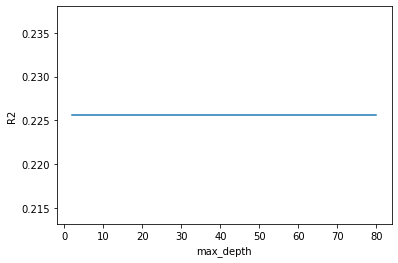

In [35]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

In [36]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
2,0.225603,1.0
52,0.225603,1.0
59,0.225603,1.0
58,0.225603,1.0
57,0.225603,1.0


- 3) You now have tried 2 different models on your data set. You need to determine which model to implement.

Overall, which model do you recommend?
Justify your recommendation.

In [37]:
# Overall, I will recommend to use Regression Tree
# Because the Regression Tree has Train score is exactly 1 which is very accurated 
# for the linear regression model, Test R-Squared is -8.656163822130806e+20 which is the out of the range for the accurated 